# Database Assignment 3
## By Gruppe H (Caroline & Maria)

In [1]:
#!pip install -U neo4j 
!pip install neo4j

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#!pip install "/Users/mariamcnally/Downloads/neo4j-5.20.0.tar"

In [1]:
from neo4j import GraphDatabase, RoutingControl, basic_auth

In [2]:
import pandas as pd
import numpy as np

## Data 

In [5]:
df1 = pd.read_csv('Materials/2016_-_Cities_Emissions_Reduction_Targets_20240207.csv')
df2 = pd.read_csv('Materials/2016_-_Citywide_GHG_Emissions_20240207.csv')
df3 = pd.read_csv('Materials/2017_-_Cities_Community_Wide_Emissions.csv')
df4 = pd.read_csv('Materials/2017_-_Cities_Emissions_Reduction_Targets_20240207.csv')
df5 = pd.read_csv('Materials/2023_Cities_Climate_Risk_and_Vulnerability_Assessments_20240207.csv')

dataframes = [df1, df2, df3, df4, df5]

In [6]:
ac = 'Organisation Number'
ci = 'City'
org = 'Organisation'
co = 'Country'
c40 = 'C40 City'
em = 'Emissions'
pop = 'City Population'
year = 'Reporting Year'
gdp = 'City GDP'

for df in dataframes:
    df.rename(columns={'Account No': ac, 'Organization Number': ac, 'Account number': ac,
                       'Organization Name': org, 'Organization': org,
                       'Country/Area': co,
                       'City Short Name': ci,
                       'Baseline emissions (metric tonnes CO2e)': em, 'Total City-wide Emissions (metric tonnes CO2e)': em, 'Total emissions (metric tonnes CO2e)': em,
                       'Population': pop, 'Current Population': pop,
                       'Reporting year': year, 'GDP': gdp,
                       'C40': c40}, inplace=True)

In [7]:
c40_to_bool = lambda x: None if pd.isnull(x) else (True if x == 'C40' else x)
for df in dataframes:
    df['C40 City'] = df['C40 City'].apply(c40_to_bool)

In [8]:
merged_df = pd.concat(dataframes)
merged_df

,Organisation,Organisation Number,Country,City,C40 City,Reporting Year,Sector,Target boundary,Baseline year,Emissions,...,CDP Region,GCoM City,Assessment attachment and/or direct link,Confirm attachment/link provided,Boundary of assessment relative to jurisdiction boundary,Year of publication or approval,Factors considered in assessment,Primary author(s) of assessment,Does the city have adaptation goal(s) and/or an adaptation plan?,Last update
0,Odder Kommune,58796.0,Denmark,Odder Kommune,None,2016.0,Total,NaN,2010,6136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Comune di Napoli,36158.0,Italy,Napoli,None,2016.0,Total,NaN,2005,2913434.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Egedal Municipality,62855.0,Denmark,Egedal Municipality,None,2016.0,Total,NaN,2009,268000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Yilan County,61753.0,Taiwan,Yilan,None,2016.0,Total,NaN,2009,3804493.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"City of Emeryville, CA",61790.0,USA,"Emeryville, CA",None,2016.0,Total,Overall community emissions,2004,178832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,"City of Salem, MA",58871.0,United States of America,Salem,False,NaN,NaN,NaN,NaN,NaN,...,United States of America,True,https://www.salemma.gov/sites/g/files/vyhlif79...,The assessment can be accessed (unrestricted) ...,Same - covers entire jurisdiction and nothing ...,2021.0,A process has been established to update the a...,Consultant,Adaptation goal(s) and adaptation plan,02/07/2024 04:14:16 AM
1366,"City of Cambridge, MA",55800.0,United States of America,"Cambridge, MA",False,NaN,NaN,NaN,NaN,NaN,...,United States of America,True,ccpralewifepreparednessplan_cambridge.pdf,The assessment has been attached and can be ac...,Smaller - covers only part of the jurisdiction...,2017.0,Assessment considers nature; Assessment consid...,Dedicated team within jurisdiction; Relevant d...,Adaptation goal(s) and adaptation plan,02/07/2024 04:14:16 AM
1367,"City of Seattle, WA",16581.0,United States of America,Seattle,True,NaN,NaN,NaN,NaN,NaN,...,United States of America,True,https://your.kingcounty.gov/dnrp/climate/docum...,The assessment can be accessed (unrestricted) ...,Larger - covers the whole jurisdiction and adj...,2021.0,Assessment considers nature; Assessment consid...,Regional/ state/ provincial government,Adaptation goal(s) and adaptation plan,02/07/2024 04:14:16 AM
1368,Durham County Council,826450.0,United Kingdom of Great Britain and Northern I...,NaN,False,NaN,NaN,NaN,NaN,NaN,...,Europe,True,Final PHSMT Climate and Health in County Durha...,The assessment has been attached,Same - covers entire jurisdiction and nothing ...,2023.0,A process has been established for prioritizin...,Dedicated team within jurisdiction; Relevant d...,Adaptation plan,02/07/2024 04:14:16 AM


In [9]:
merged_df.isnull().sum()

Organisation                                                                           187
Organisation Number                                                                    187
Country                                                                                  2
City                                                                                   441
C40 City                                                                               815
Reporting Year                                                                        1370
Sector                                                                                1906
Target boundary                                                                       2250
Baseline year                                                                         1825
Emissions                                                                             1532
Percentage reduction target                                                           1860

In [10]:
df = merged_df.replace({np.nan: None})

In [11]:
df.sample(5)

,Organisation,Organisation Number,Country,City,C40 City,Reporting Year,Sector,Target boundary,Baseline year,Emissions,...,CDP Region,GCoM City,Assessment attachment and/or direct link,Confirm attachment/link provided,Boundary of assessment relative to jurisdiction boundary,Year of publication or approval,Factors considered in assessment,Primary author(s) of assessment,Does the city have adaptation goal(s) and/or an adaptation plan?,Last update
938,"City of St. Petersburg, FL",49172.0,United States of America,St. Petersburg,False,None,None,None,None,None,...,United States of America,True,https://cms5.revize.com/revize/stpete/Resident...,The assessment can be accessed (unrestricted) ...,Same - covers entire jurisdiction and nothing ...,2017.0,Assessment considers nature; Assessment consid...,Consultant; Relevant department within jurisdi...,Adaptation goal(s) and adaptation plan,02/07/2024 04:14:16 AM
901,Región Metropolitana de Santiago,31180.0,Chile,Santiago,True,None,None,None,None,None,...,Latin America,True,https://www.santiagoresiliente.cl/wp-content/u...,The assessment can be accessed (unrestricted) ...,Same - covers entire jurisdiction and nothing ...,2017.0,Assessment considers nature; Assessment consid...,Consultant; Dedicated team within jurisdiction,Adaptation goal(s) and adaptation plan,02/07/2024 04:14:16 AM
1093,City of Sydney,31114.0,Australia,City of Sydney,True,None,None,None,None,None,...,Oceania,True,The Sydney Equality Indicators Framework (1).pdf,The assessment has been attached and can be ac...,Same - covers entire jurisdiction and nothing ...,2019.0,Assessment considers vulnerable populations,Consultant,Adaptation goal(s) and adaptation plan,02/07/2024 04:14:16 AM
523,"Town of Whitby, ON",840269.0,Canada,Whitby,False,None,None,None,None,None,...,Canada,True,Town of Whitby Climate Emergency Response Plan...,The assessment has been attached,Same - covers entire jurisdiction and nothing ...,2022.0,A process has been established for prioritizin...,Consultant; Dedicated team within jurisdiction,Adaptation goal(s) and adaptation plan,02/07/2024 04:14:16 AM
608,Lund Municipality,54519.0,Sweden,Lund,False,None,None,None,None,None,...,Europe,True,https://moten.lund.se/welcome-sv/namnder-styre...,The assessment can be accessed (unrestricted) ...,Same - covers entire jurisdiction and nothing ...,2020.0,A process has been established for prioritizin...,Relevant department within jurisdiction,Adaptation goal(s) and adaptation plan,02/07/2024 04:14:16 AM


## Database
### Setup connection

In [3]:
# DB URI and authentication
URI = "bolt://localhost:7687"
AUTH = ("neo4j","12345678")

In [15]:
driver = GraphDatabase.driver(URI, auth=AUTH)

In [16]:
driver.verify_connectivity()

### Query templates

In [15]:
# template write request
def write_query(query, params={}):
    with driver.session(database="neo4j") as session:
        session.execute_write(lambda tx: tx.run(query, params).data())

In [7]:
# template read request
def read_query(query, params={}):
    with driver.session(database="neo4j") as session:
        results = session.execute_read(lambda tx: tx.run(query, params).data())       
        return [list(record.values()) for record in results]

## Input data in database

##### City

In [17]:
create_city = """
MERGE (c:City {name: $city})
SET c.population = CASE trim(toString($city_population)) WHEN 'None' THEN null ELSE $city_population END,
    c.gdp = CASE trim(toString($city_gdp)) WHEN 'None' THEN null ELSE $city_gdp END,
    c.c40 = CASE trim(toString($c40_city)) WHEN 'None' THEN null ELSE $c40_city END,
    c.gcom = CASE trim(toString($gcom_city)) WHEN 'None' THEN null ELSE $gcom_city END
"""

In [18]:
optional_columns = ['City Population', 'City GDP', 'C40 City', 'GCoM City']

for index, row in df.iterrows():
    if 'City' in df.columns and pd.notnull(row['City']):
        params = {'city': row['City']}
        
        for column in optional_columns:
            if column in df.columns:
                params[column.lower().replace(' ', '_')] = row[column]
            else:
                params[column.lower().replace(' ', '_')] = None
        
        write_query(create_city, params=params)

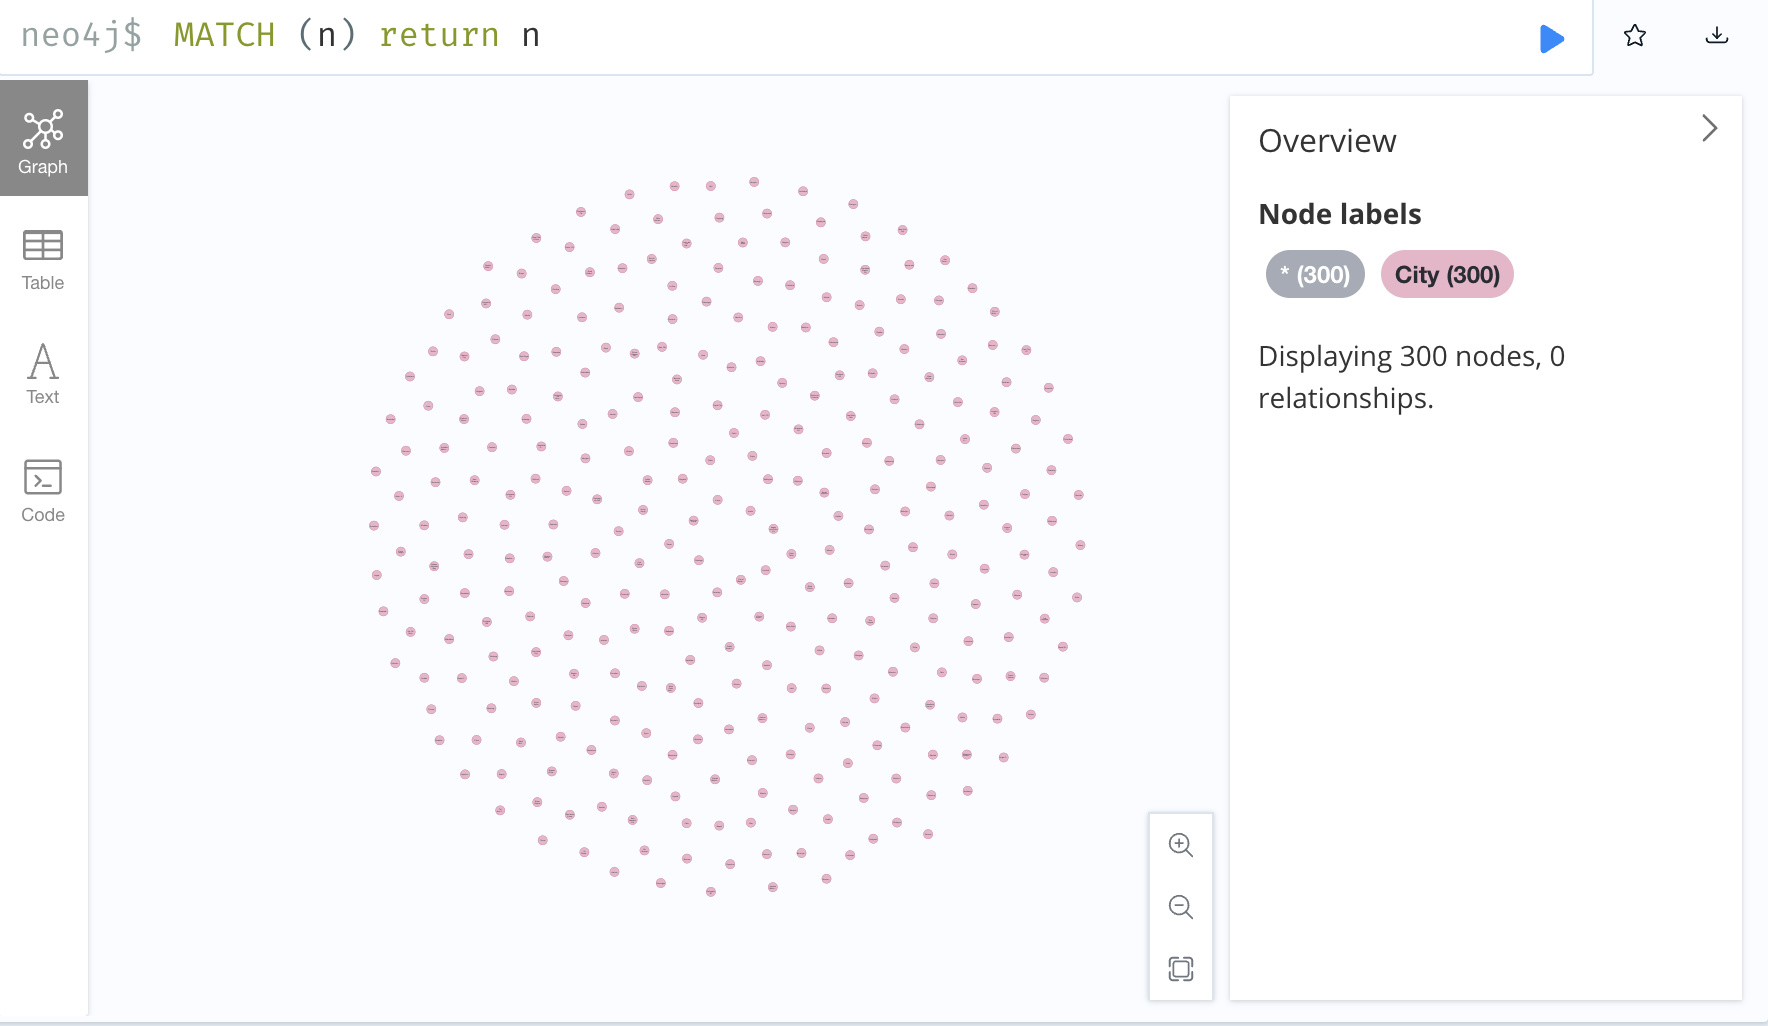

##### Country

In [19]:
add_country = """
MERGE (country:Country {name: $country})
WITH country
MATCH (city:City {name: $city})
MERGE (city)-[:IN_COUNTRY]->(country)
RETURN city
"""

In [20]:
add_country_region = """
MERGE (country:Country {name: $country})
WITH country
MERGE (region:Region {name: $region}) 
WITH country, region
MATCH (city:City {name: $city})
MERGE (city)-[:IN_COUNTRY]->(country)
MERGE (country)-[:IN_REGION]->(region) 
RETURN city
"""

In [21]:
for index, row in df.iterrows():
    if 'City' in df.columns and pd.notnull(row['City']) and 'Country' in df.columns and pd.notnull(row['Country']):
        params = {'country': row['Country'], 'city': row['City']}
        if 'Region' in df.columns and pd.notnull(row['Region']):
            params['region'] = row['Region']
            write_query(add_country_region, params=params)
        else:
            write_query(add_country, params=params)

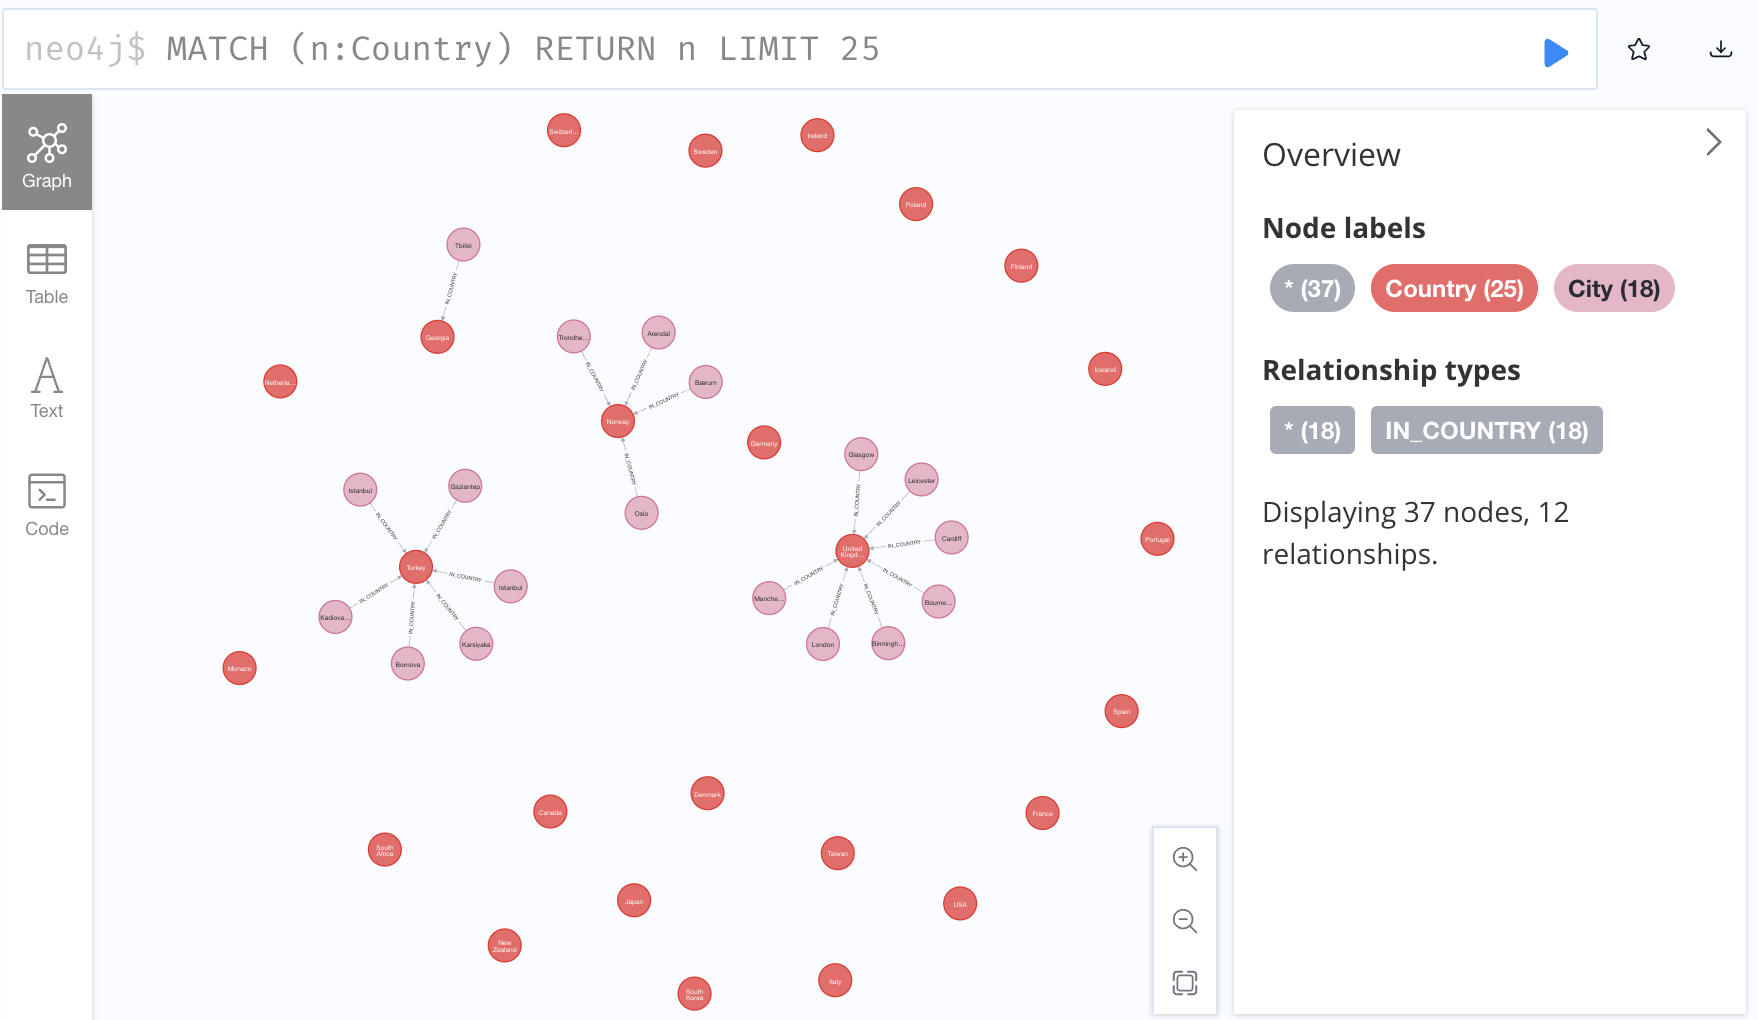

##### Organisation

In [22]:
create_org = """
MERGE (o:Organisation {name:$organisation})
SET o.org_number = CASE trim(toString($organisation_number)) WHEN 'None' THEN null ELSE $organisation_number END,
    o.sector = CASE trim(toString($sector)) WHEN 'None' THEN null ELSE $sector END
"""

In [23]:
add_org_city = """
MERGE (o:Organisation {name:$organisation})
ON CREATE SET o.org_number = CASE trim(toString($organisation_number)) WHEN 'None' THEN null ELSE $organisation_number END,
    o.sector = CASE trim(toString($sector)) WHEN 'None' THEN null ELSE $sector END
WITH o
MATCH (c:City {name: $city})
MERGE (o)-[:IN_CITY]->(c)
RETURN c
"""

In [24]:
optional_columns = ['Organisation Number', 'Sector']

for index, row in df.iterrows():
    if 'Organisation' in df.columns and pd.notnull(row['Organisation']):
        params = {'organisation': row['Organisation']}
        
        for column in optional_columns:
            if column in df.columns:
                params[column.lower().replace(' ', '_')] = row[column]
            else:
                params[column.lower().replace(' ', '_')] = None
                
        if 'City' in df.columns and pd.notnull(row['City']):
            params['city'] = row['City']
            write_query(add_org_city, params=params)
        else:
            write_query(create_org, params=params)            

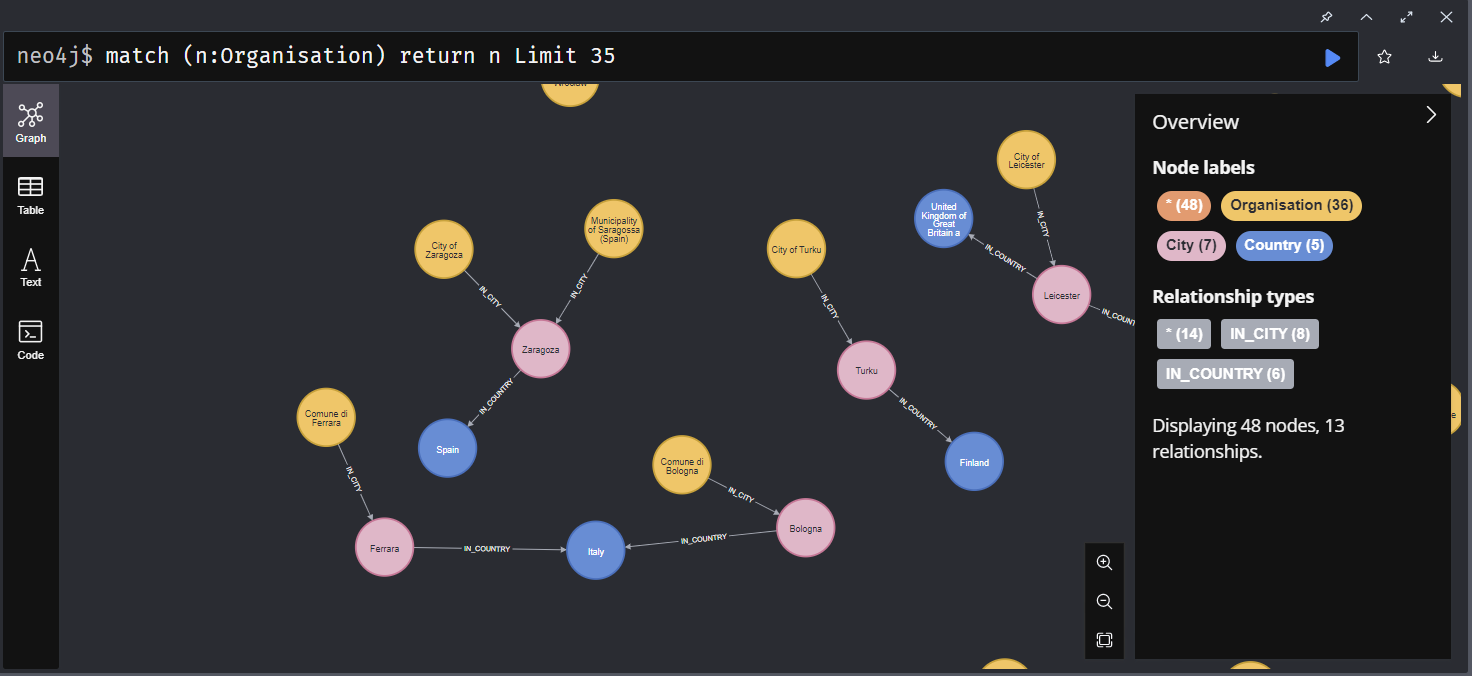

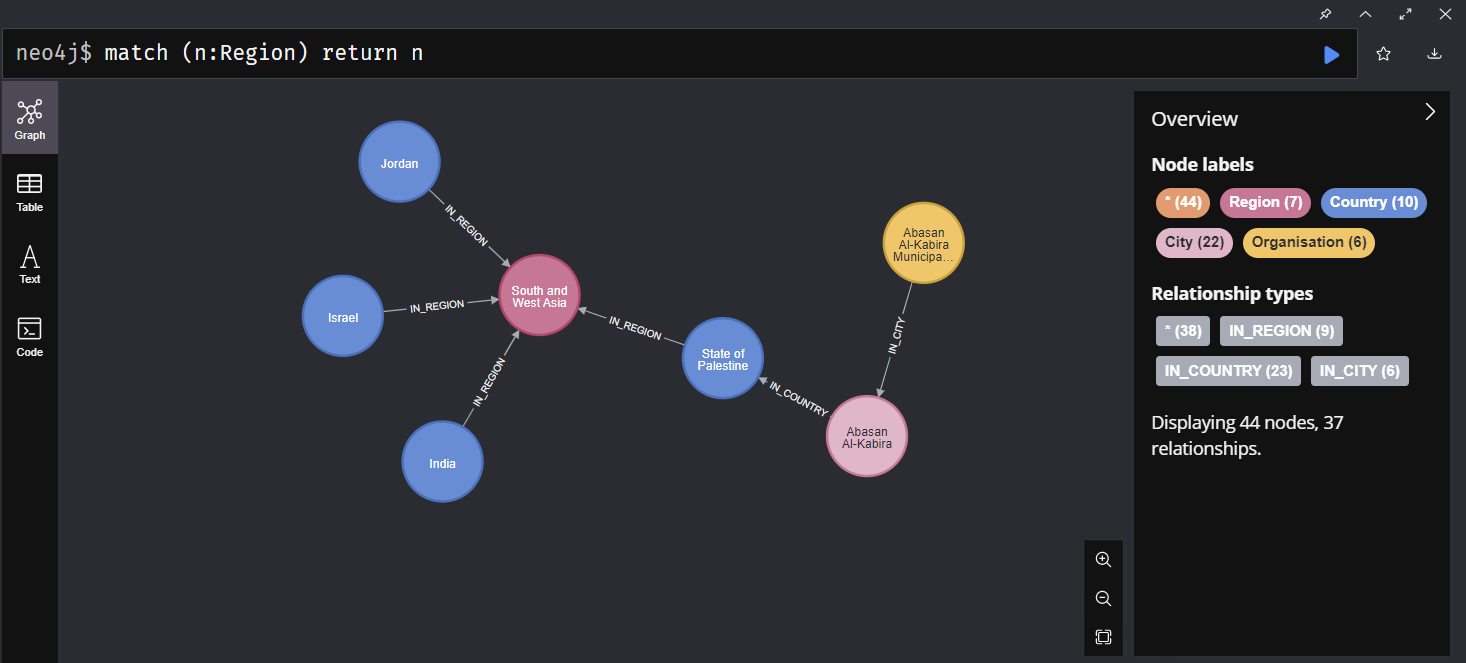

##### Emissions

In [25]:
add_em = """
MERGE (e:Emission {total_emission: $emissions})
WITH e
MATCH (o:Organisation {name: $organisation})
MERGE (o)-[em:EMITS]-(e)
SET em.year = CASE trim(toString($year)) WHEN 'None' THEN null ELSE $year END
RETURN o
"""

In [26]:
for index, row in df.iterrows():
    if 'Emissions' in df.columns and pd.notnull(row['Emissions']) and 'Organisation' in df.columns and pd.notnull(row['Organisation']):
        params = {'emissions': row['Emissions'], 'organisation': row['Organisation']}
        if 'Baseline year' in df.columns:
            params['year'] = row['Baseline year']
        else:
            params['year'] = None
        write_query(add_em, params=params)

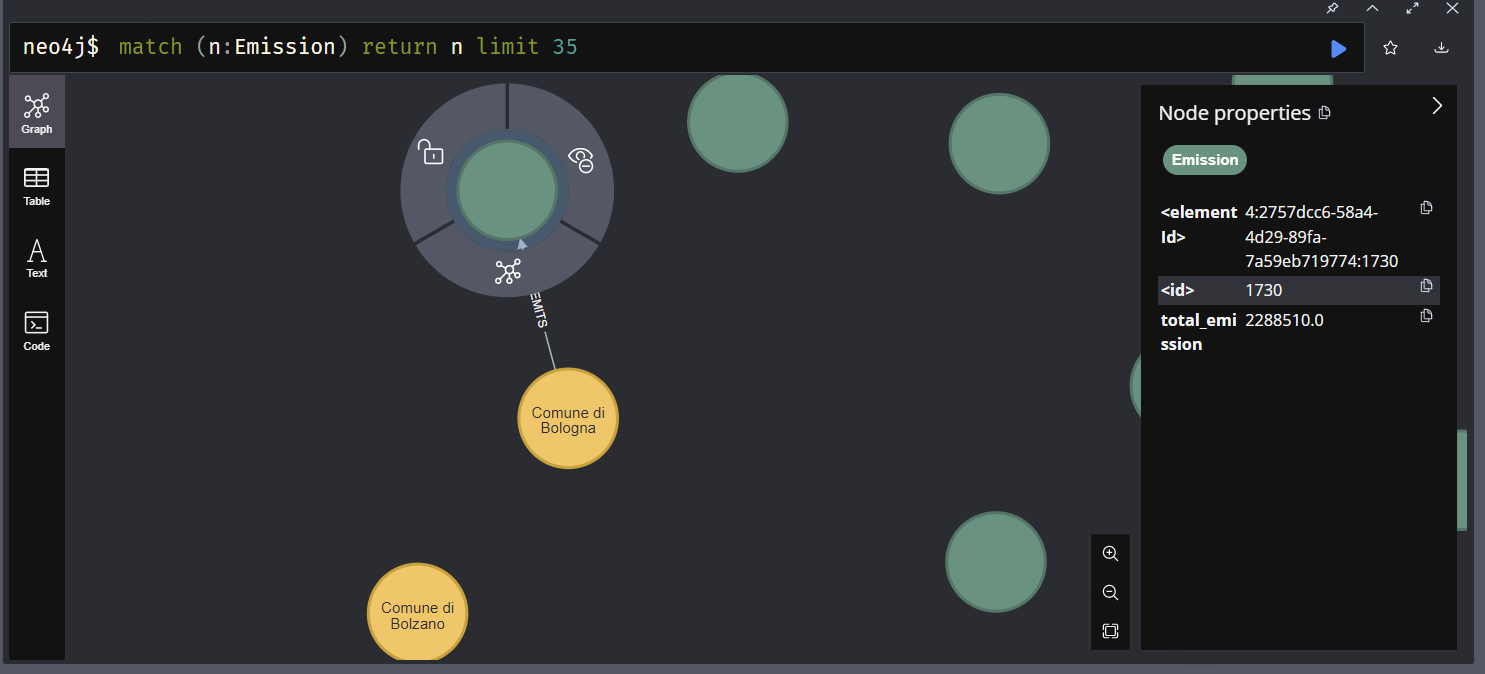

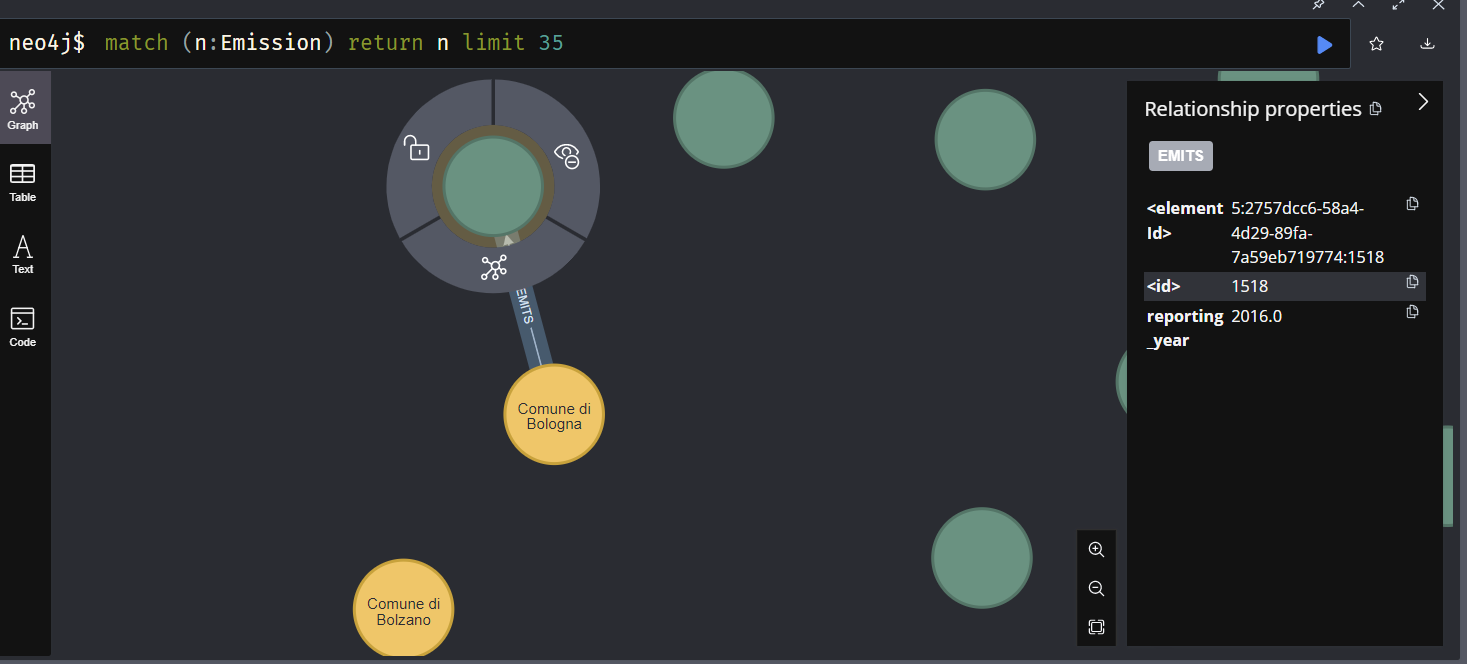

##### Percentage reduction target

In [27]:
add_red = """
MERGE (e:Emission {pct_target_reduction: $pct})
WITH e
MATCH (o:Organisation {name: $organisation})
MERGE (o)-[em:EMITS]-(e)
SET em.year = CASE trim(toString($year)) WHEN 'None' THEN null ELSE $year END
RETURN o
"""

In [28]:
for index, row in df.iterrows():
    if 'Percentage reduction target' in df.columns and pd.notnull(row['Percentage reduction target']) and 'Organisation' in df.columns and pd.notnull(row['Organisation']):
        params = {'pct': row['Percentage reduction target'], 'organisation': row['Organisation']}
        if 'Reporting Year' in df.columns:
            params['year'] = row['Reporting Year']
        else:
            params['year'] = None
        write_query(add_red, params=params)

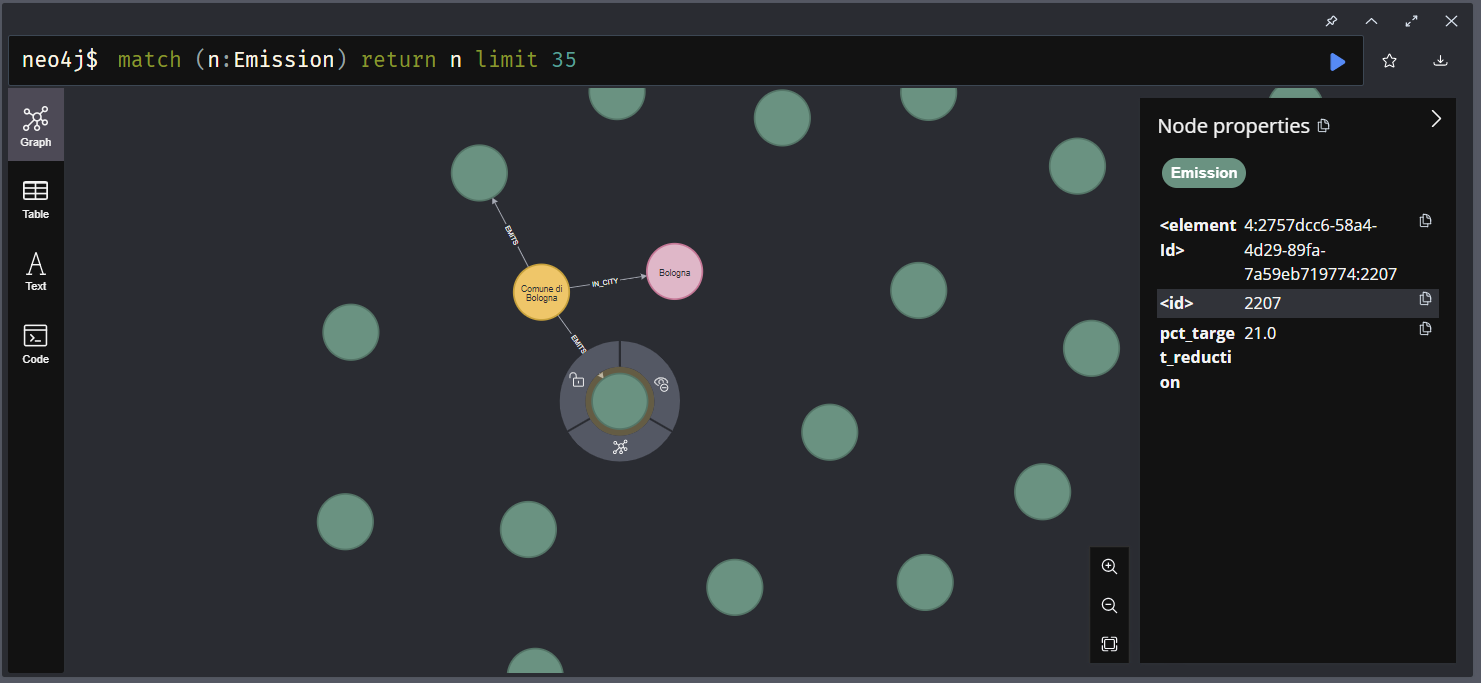

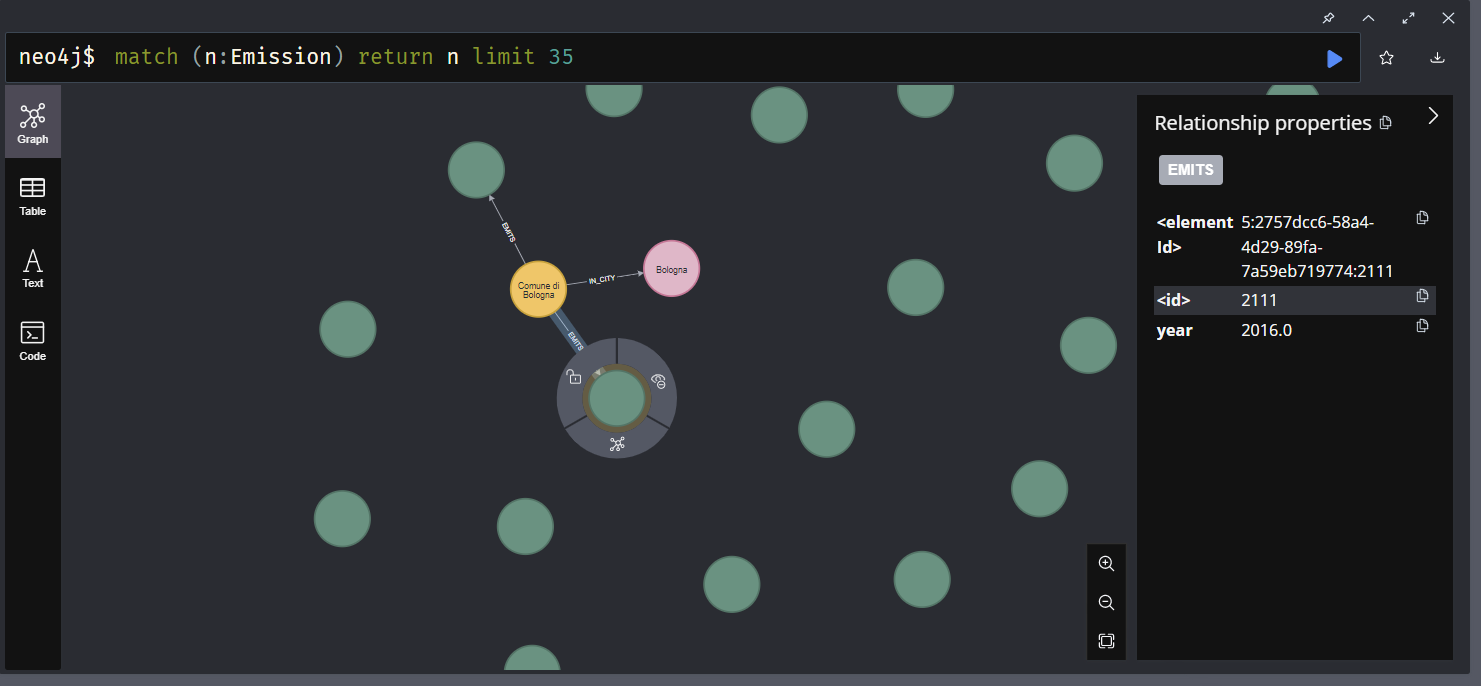

## Answers to our Questions

##### Question 1:

In [17]:
q1 = """
MATCH (city)<-[:IN_CITY]-(o:Organisation)-[:EMITS]->(e:Emission)
WITH city.population AS population,
     COALESCE(SUM(e.total_emission), 0) AS totalEmissions
WHERE population IS NOT NULL

WITH collect({population: population, totalEmissions: totalEmissions}) AS data
WITH [d IN data | d.population] AS populations,
     [d IN data | d.totalEmissions] AS emissions

// Compute correlation coefficient
WITH size(populations) AS n,
     REDUCE(s = 0.0, i IN RANGE(0, size(populations)-1) | s + populations[i] * emissions[i]) AS sumXY,
     REDUCE(sx = 0.0, x IN populations | sx + x) AS sumX,
     REDUCE(sy = 0.0, y IN emissions | sy + y) AS sumY,
     REDUCE(sxx = 0.0, x IN populations | sxx + x * x) AS sumXX,
     REDUCE(syy = 0.0, y IN emissions | syy + y * y) AS sumYY
WITH n, sumXY, sumX, sumY, sumXX, sumYY,
     (n * sumXY - sumX * sumY) AS covarianceXY,
     sqrt((n * sumXX - sumX * sumX) * (n * sumYY - sumY * sumY)) AS denominator
RETURN covarianceXY / denominator AS correlationCoefficient
"""

read_query(q1)

[[0.07639645985809722]]

##### Question 2:

In [19]:
q2 = """
"""

#read_query(q2)

##### Question 3:

In [11]:
q3 = """
MATCH (o:Organisation)-[:EMITS {year: 2016.0}]-(e: Emission)
WITH AVG(e.pct_target_reduction) AS avg2016

MATCH (o:Organisation)-[:EMITS {year: 2017.0}]-(e: Emission)
WITH avg2016, AVG(e.pct_target_reduction) AS avg2017

RETURN avg2016, avg2017,
avg2017 - avg2016 AS pctTargetReductionChange
"""

read_query(q3)

[[33.31395348837209, 42.71794952681388, 9.40399603844179]]

##### Question 4:

In [36]:
q4 = """
MATCH (e:Emission)-[:EMITS]-(:Organisation)-[:IN_CITY]->(city:City)
WHERE city.c40 IS NOT NULL
WITH city, AVG(e.pct_target_reduction) AS avg
WHERE city.c40 = true
RETURN 'C40 member' AS organization, AVG(avg) AS avgPctTargetReduction

UNION

MATCH (e:Emission)-[:EMITS]-(:Organisation)-[:IN_CITY]->(city:City)
WHERE city.c40 = false OR city.c40 IS NULL
WITH city, AVG(e.pct_target_reduction) AS avg
RETURN 'Not C40 member' AS organization, AVG(avg) AS avgPctTargetReduction

UNION

MATCH (e:Emission)-[:EMITS]-(:Organisation)-[:IN_CITY]->(city:City)
WHERE city.gcom IS NOT NULL
WITH city, AVG(e.pct_target_reduction) AS avg
WHERE city.gcom = true
RETURN 'GCoM member' AS organization, AVG(avg) AS avgPctTargetReduction

UNION

MATCH (e:Emission)-[:EMITS]-(:Organisation)-[:IN_CITY]->(city:City)
WHERE city.gcom IS NULL OR city.gcom = false
WITH city, AVG(e.pct_target_reduction) AS avg
RETURN 'Not GCoM member' AS organization, AVG(avg) AS avgPctTargetReduction
"""

read_query(q4)

[['C40 member', 48.570621468926554],
 ['Not C40 member', 38.96051232993197],
 ['GCoM member', 45.418929440389306],
 ['Not GCoM member', 36.78375407697325]]

##### Question 5:

In [29]:
q5 = """
MATCH (e:Emission)-[:EMITS]-(:Organisation)-[:IN_CITY]->(:City)-[:IN_COUNTRY]->(:Country)-[:IN_REGION]->(region:Region)
WITH region, SUM(e.total_emission) AS totalEmissions, AVG(e.pct_target_reduction) AS avgPctTargetReduction
RETURN region.name AS regionName, totalEmissions, avgPctTargetReduction
"""

read_query(q5)

[['Africa', 190251205.0, 25.833333333333332],
 ['Europe', 842691431.23, 43.83306748466259],
 ['North America', 1731127194.1999998, 45.235714285714295],
 ['South Asia and Oceania', 347892832.32, 43.871794871794876],
 ['East Asia', 903263437.48, 23.464],
 ['Latin America', 6013807422.66, 34.3095238095238],
 ['South and West Asia', 23797212.0, 16.25]]

##### Question 6:

In [30]:
q6 = """
MATCH (e:Emission)-[:EMITS]-(o:Organisation)
WHERE e.pct_target_reduction IS NOT NULL
WITH o.name AS orgName, MAX(e.pct_target_reduction) AS maxReductionPct
RETURN orgName, maxReductionPct
ORDER BY maxReductionPct DESC
LIMIT 1
"""

read_query(q6)

[['Fredensborg Kommune', 100.0]]

##### Question 7:

In [8]:
q7 = """
MATCH (city:City)-[:IN_COUNTRY]->(country:Country)
RETURN country.name AS countryName, count(city) AS numberOfCities
ORDER BY countryName
"""

read_query(q7)

[['Albania', 1],
 ['Argentina', 9],
 ['Australia', 14],
 ['Belgium', 1],
 ['Bolivia', 2],
 ['Brazil', 34],
 ['Bulgaria', 2],
 ['Burundi', 1],
 ['Cameroon', 3],
 ['Canada', 34],
 ['Chile', 7],
 ['China', 3],
 ['China, Hong Kong Special Administrative Region', 1],
 ['Colombia', 15],
 ['Comoros', 1],
 ['Costa Rica', 3],
 ['Croatia', 1],
 ['Czechia', 1],
 ["Côte d'Ivoire", 1],
 ['Democratic Republic of Congo', 1],
 ['Democratic Republic of the Congo', 1],
 ['Denmark', 26],
 ['East Asia', 7],
 ['Ecuador', 7],
 ['Estonia', 3],
 ['Eswatini', 1],
 ['Ethiopia', 2],
 ['Finland', 7],
 ['France', 7],
 ['Georgia', 1],
 ['Germany', 8],
 ['Ghana', 1],
 ['Gibraltar', 1],
 ['Greece', 1],
 ['Hong Kong', 1],
 ['Iceland', 2],
 ['India', 7],
 ['Indonesia', 5],
 ['Ireland', 2],
 ['Israel', 2],
 ['Italy', 21],
 ['Japan', 9],
 ['Jordan', 2],
 ['Kenya', 4],
 ['Latvia', 1],
 ['Lithuania', 2],
 ['Madagascar', 1],
 ['Malawi', 1],
 ['Malaysia', 4],
 ['Mexico', 14],
 ['Monaco', 1],
 ['Montenegro', 1],
 ['Morocco', 

##### Question 8:

In [32]:
q8 = """
MATCH (c:Country)
RETURN count(c) AS numberOfCountriesInData
"""

read_query(q8)

[[91]]

##### Question 9:

In [9]:
q9 = """
MATCH (o:Organisation)-[:EMITS]->(e:Emission)
WHERE e.pct_target_reduction IS NOT NULL AND e.total_emission IS NULL
RETURN count(DISTINCT o) AS orgsWithPctTargetButNoBaseline
"""

read_query(q9)

[[246]]

##### Question 10:

In [33]:
q10 = """
MATCH (o:Organisation)
WHERE o.sector IS NOT NULL
WITH o.sector AS sector, count(o) AS sectorCount
ORDER BY sectorCount DESC
LIMIT 1
RETURN sector AS mostCommonSector, sectorCount AS countOfOrganisations
"""

read_query(q10)

[['Total', 148]]

## Close the Connection

In [21]:
driver.close()